In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
dataset='/content/drive/MyDrive/GenzeonMLPrep/16-06-2023/SUV_Purchase.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [2]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#Separating features and traget
X= df.drop(['User ID', 'Purchased'], axis=1)
Y = df['Purchased']


In [4]:
print(X)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


In [5]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [6]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [10]:
y_pred=knn_clf.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [11]:
knn_clf.score(sc.transform(X),Y)#do it again doing scaling for X


0.925

In [12]:
import numpy as np
#for best k values
neighbors=np.arange(1,20)#array and initialize it with 1,20
overall_accuracy=np.empty(len(neighbors))
training_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,Y_train)

  training_accuracy[i]=knn_clf.score(X_train,Y_train)

  test_accuracy[i]=knn_clf.score(X_test,Y_test)


  #overall accuracy
  overall_accuracy[i]=knn_clf.score(sc.transform(X),Y)

#Generate the graphs


In [13]:

overall_accuracy

array([0.985 , 0.9225, 0.925 , 0.91  , 0.9175, 0.915 , 0.915 , 0.915 ,
       0.9075, 0.9175, 0.915 , 0.9125, 0.9125, 0.91  , 0.9075, 0.9075,
       0.9075, 0.905 , 0.9075])

In [14]:
training_accuracy


array([1.      , 0.921875, 0.91875 , 0.9     , 0.909375, 0.90625 ,
       0.90625 , 0.90625 , 0.896875, 0.909375, 0.90625 , 0.903125,
       0.903125, 0.9     , 0.896875, 0.896875, 0.896875, 0.89375 ,
       0.896875])

In [15]:
test_accuracy

array([0.925, 0.925, 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 , 0.95 ,
       0.95 ])

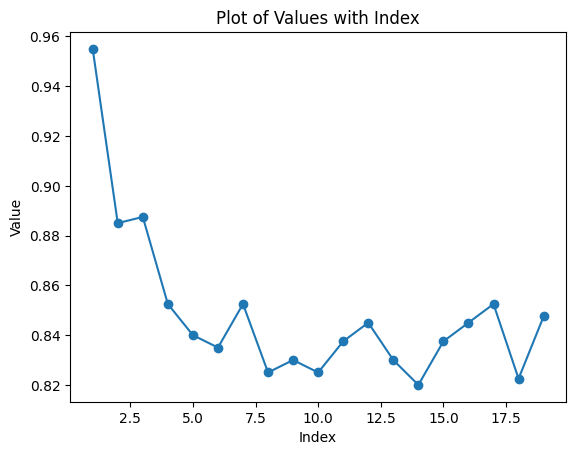

In [16]:
import numpy as np
import matplotlib.pyplot as plt

values = np.array([0.955 , 0.885 , 0.8875, 0.8525, 0.84  , 0.835 , 0.8525, 0.825 ,
       0.83  , 0.825 , 0.8375, 0.845 , 0.83  , 0.82  , 0.8375, 0.845 ,
       0.8525, 0.8225, 0.8475])

# Generate the index values starting from 1
indices = np.arange(1, len(values) + 1)

# Plot the values
plt.plot(indices, values, marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of Values with Index')
plt.show()


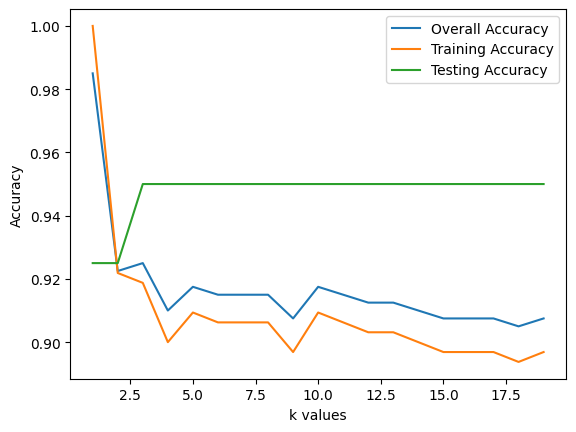

In [18]:
import matplotlib.pyplot as plt
plt.plot(neighbors,overall_accuracy,label="Overall Accuracy")
plt.plot(neighbors,training_accuracy,label="Training Accuracy")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()